# LightGBM and CatBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.5 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 1.0/102.5 MB 2.2 MB/s eta 0:00:47
    --------------------------------------- 1.8/102.5 MB 2.5 MB/s eta 0:00:41
    --------------------------------------- 2.1/102.5 MB 2.4 MB/s eta 0:00:42
   - -------------------------------------- 2.6/102.5 MB 2.2 MB/s eta 0:00:45
   - -------------------------------------- 3.1/102.5 MB 2.3 MB/s eta 0:00:45
   - -------------------------------------- 3.7/102.5 MB 2.3 MB/s eta 0:00:43
   - -------------------------------------- 4.2/102.5 MB 2.4 MB/s eta 0:00:41
   - -------------------------------------- 5.0/102.5 MB 2.4 MB/s eta 0:00:41
   -- ------------------------------------- 5.2/102.5 MB 2.4 MB/s eta 0:00:40
   -- ------------------------------------- 6.0/102.5 MB 2.4 MB/s eta 0:00:40



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [5]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print("Dataset shape:", X.shape)
print("Target distribution:\n", pd.Series(y).value_counts())

Dataset shape: (178, 13)
Target distribution:
 1    71
0    59
2    48
Name: count, dtype: int64


## Train - Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## LightGBM

In [7]:
lgb = LGBMClassifier(n_estimators=200, random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 133, number of used features: 13
[LightGBM] [Info] Start training from score -1.106159
[LightGBM] [Info] Start training from score -0.920057
[LightGBM] [Info] Start training from score -1.306830
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

## CatBoost

In [8]:
cat = CatBoostClassifier(iterations=200, verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

## Evaluation

=== LightGBM ===
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



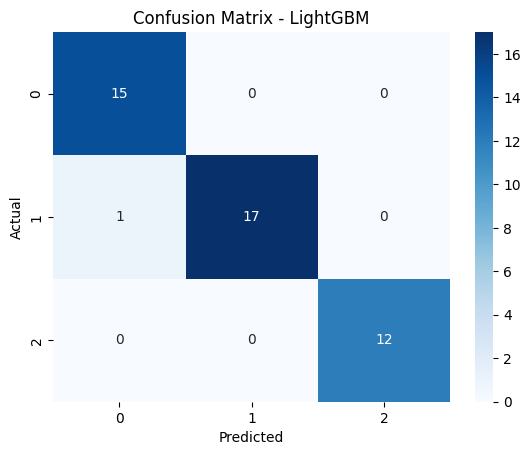

=== CatBoost ===
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



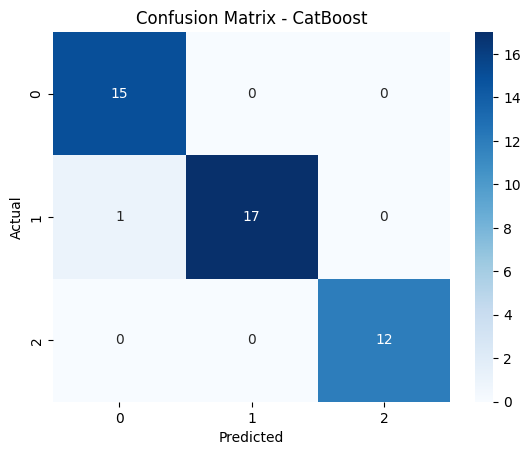

In [9]:
models = {
    "LightGBM": (y_pred_lgb, lgb),
    "CatBoost": (y_pred_cat, cat)
}

for name, (y_pred, model) in models.items():
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Feature Importance


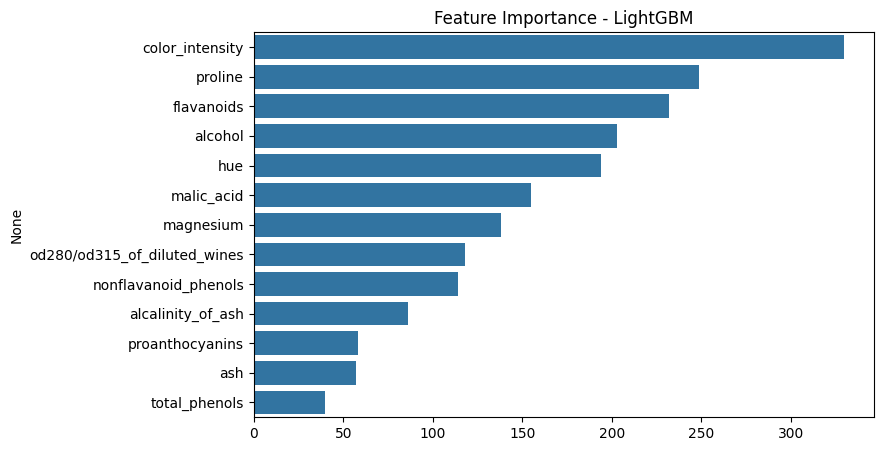

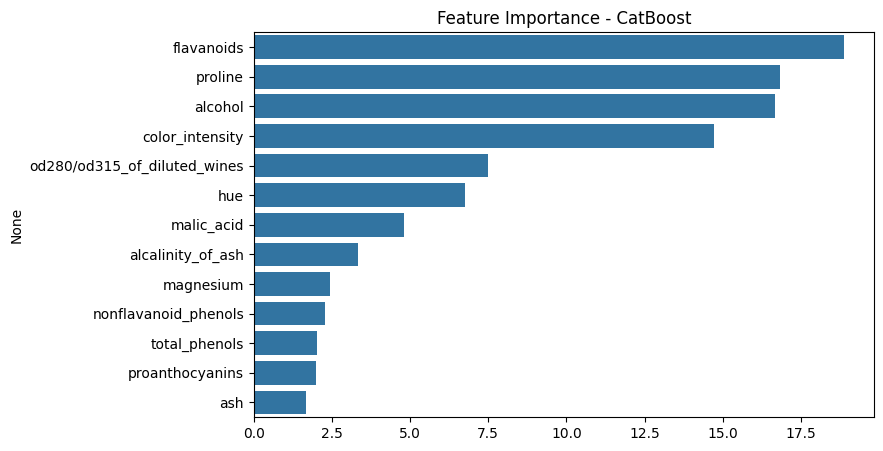

In [10]:
for name, (y_pred, model) in models.items():
    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=data.feature_names).sort_values(ascending=False)
        plt.figure(figsize=(8,5))
        sns.barplot(x=importances.values, y=importances.index)
        plt.title(f"Feature Importance - {name}")
        plt.show()
